#**Week 11 - Group Activity on Pre-processsing**



> _Do the following on the dataset:_

1.   **Load the data into python environment and identify some basic details of the dataset**
2.   **Reset the index as 'name' as the index**
3.   **Select rows for specific names Jack Morgan and Josh Wills**
4.   **Select data for multiple values "Sales" and "Finance"**
5.   **Display employee who has more than 700 performance score**
6.   **Display employee who has more than 500 and less than 700 performance score**
7.   **Check and handle missing values in the dataset**
8.   **Check the outliers and handle outliers in performance score using percentiles**
9.   **Check the gender column and do Dummy encoding**
10.  **Do the standard scaling on the feature performance score**

##**1. Load the data into python environment and identify some basic details of the dataset**

######***Importing necessary libraries***

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


######***Reading dataset employee.csv in to Python Environment using read_csv(). The first 5 observations are displayed.***

In [105]:
df=pd.read_csv('/content/gdrive/MyDrive/ICTAK/employee.csv')
df.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


######***Displaying the last 5 observations***

In [106]:
df.tail()

,name,age,income,gender,department,grade,performance_score
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


######***Identifying the basic details of the dataset***

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [108]:
df.describe(include='all')

,name,age,income,gender,department,grade,performance_score
count,9,7.000000,7.000000,7,9,9,9.000000
unique,9,NaN,NaN,2,3,4,NaN
top,Allen Smith,NaN,NaN,F,Operations,G3,NaN
freq,1,NaN,NaN,5,3,5,NaN
mean,NaN,40.428571,52857.142857,NaN,NaN,NaN,610.666667
std,NaN,12.204605,26028.372797,NaN,NaN,NaN,235.671912
min,NaN,23.000000,16000.000000,NaN,NaN,NaN,53.000000
25%,NaN,31.000000,38500.000000,NaN,NaN,NaN,556.000000
50%,NaN,45.000000,52000.000000,NaN,NaN,NaN,674.000000
75%,NaN,49.500000,63500.000000,NaN,NaN,NaN,711.000000


######***Finding the no: of Observations***

In [109]:
df.shape

(9, 7)

######***Checking for null values***

In [110]:
df.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

##**Insights:**


*   The dataset contains the details of employees, like -     
      *   _**Name** - Name of the Employee_      
      *   _**Age** - Employee's age in years_
      *   _**Income** - Employee's monthly income_
      *   _**Gender** - Employee's gender [ F=Female, M=Male ]_
      *   _**Department** - Department name where the employee is working_
      *   _**Grade** - Designation of the employee_
      *   _**Performance score** - Employee's score based on their performance_
*   **9 Observations** and **7 Features** are found.
*   The **Null values** are recorded for:
      *   _The feature **Age** contains **2** null observations_
      *   _The feature **Income** contains **2** null observations_
      *   _The feature **Gender** contains **2** null observations_
*  The **datatype** for the features - 
      *   _**Performance_score**  - is given as Integer with 64-bits_
      *   _**Name, Gender, Department, Grade** - are given as Objects_
      *   _**Age, Income** - are given as Float with 64-bits_
*   The range of values:
      *   _The **age** ranges from **23 to 54**_
      *   _The **income** ranges from **6000 to 98000**_
      *   _The **performance score** ranges from **53 to 901**_

######***Count Plot for Gender in each Department***

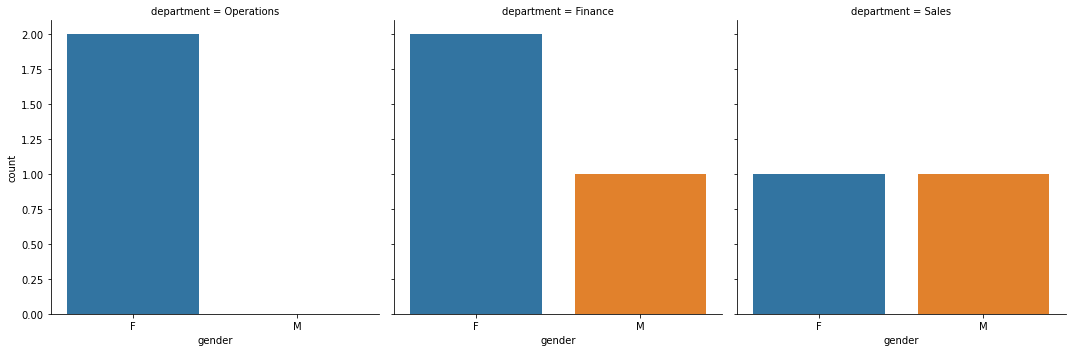

In [111]:
sns.catplot(x ="gender", col ='department', kind ="count", data = df)

##**Insights:**
_Just by observing the graph, it can be approximated that the women are greater in number than that of men and is found high in Operations department_

######***Violin Plot for Age Vs Gender***

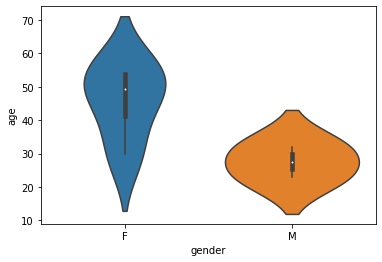

In [112]:
sns.violinplot(x ="gender", y ="age", data = df, split = True)

##**Insights:**
_Just by observing the graph,_ 
*   Most of the women are in the age range 45-55.
*   Most of the men are in the age range 20-30.

##**2. Reset the index as 'name' as the index**

In [113]:
df=pd.read_csv('/content/gdrive/MyDrive/ICTAK/employee.csv', index_col='name')
df.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


##**3. Select rows for specific names Jack Morgan and Josh Wills**

In [114]:
df.loc[['Jack Morgan', 'Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


##**4. Select data for multiple values "Sales" and "Finance"**

In [115]:
df.apply(lambda row: row[df['department'].isin(['Sales','Finance'])])

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


##**5. Display employee who has more than 700 performance score**

In [116]:
df[df['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


##**6. Display employee who has more than 500 and less than 700 performance score**

In [117]:
df[(df['performance_score']>500) & (df['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


##**7. Check and handle missing values in the dataset**

In [118]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


######***Filling missing values for the features Age and Income***

In [119]:
for i in ['age', 'income']:
  df[i]=df[i].fillna(df[i].median())
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,NaN,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,NaN,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


######***Filling missing values for the feature Gender***

In [120]:
df['gender']=df['gender'].fillna(df['gender'].mode()[0])
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


##**8. Check the outliers and handle outliers in performance score using percentiles**

######***Checking for the outliers***

{'boxes': [<matplotlib.lines.Line2D at 0x7efe5917f150>],
 'caps': [<matplotlib.lines.Line2D at 0x7efe591851d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7efe5918b210>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7efe59185c90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7efe5917f710>,
  <matplotlib.lines.Line2D at 0x7efe5917fc50>]}

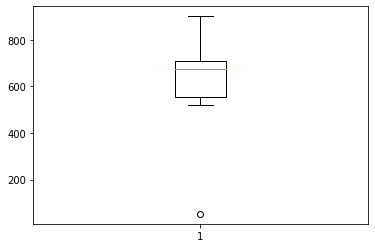

In [121]:
plt.boxplot(df['performance_score'])

######***Handling the outliers by removing the values below the lower limit***

In [122]:
Q1=np.percentile(df['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(df['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(df['performance_score'],75,interpolation='midpoint')
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
df.loc[df['performance_score']<low_limit]

,age,income,gender,department,grade,performance_score
name,,,,,,
James Authur,54.0,52000.0,F,Operations,G3,53


In [123]:
df.drop(df.loc[df['performance_score']<low_limit].index, inplace=True)

{'boxes': [<matplotlib.lines.Line2D at 0x7efe5904f690>],
 'caps': [<matplotlib.lines.Line2D at 0x7efe59055710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7efe5905c750>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7efe5905c210>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7efe5904fc50>,
  <matplotlib.lines.Line2D at 0x7efe590551d0>]}

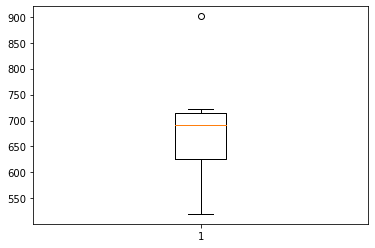

In [129]:
plt.boxplot(df['performance_score'])

##**9. Check the gender column and do Dummy encoding**

In [130]:
dummy_gender = pd.get_dummies(df['gender'], prefix='Gender_')
dummy_gender

,Gender__F,Gender__M
name,,
Allen Smith,1,0
S Kumar,1,0
Jack Morgan,0,1
Ying Chin,1,0
Dheeraj Patel,1,0
Satyam Sharma,1,0
Josh Wills,1,0
Leo Duck,0,1


In [131]:
df = pd.merge(
    left=df,
    right=dummy_gender,
    left_index=True,
    right_index=True,
)
df

,age,income,gender,department,grade,performance_score,Gender__F,Gender__M
name,,,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723,1,0
S Kumar,45.0,16000.0,F,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,M,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,F,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.0,F,Sales,G3,649,1,0
Josh Wills,54.0,52000.0,F,Finance,G3,901,1,0
Leo Duck,23.0,98000.0,M,Sales,G4,709,0,1


##**10. Do the standard scaling on the feature performance score**

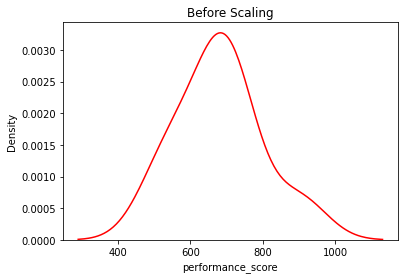

In [132]:
plt.title('Before Scaling')
sns.kdeplot(df['performance_score'], color ='r')

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
performance_score=df['performance_score'].values.reshape(-1,1)
performance_score=scaler.fit_transform(performance_score)
performance_score=pd.DataFrame(performance_score)

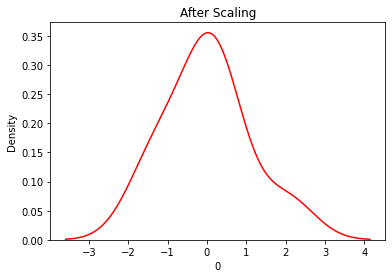

In [134]:
plt.title('After Scaling')
sns.kdeplot(performance_score[0], color ='r')